## Esame di Metodi Numerici

21 Luglio 2023

# Esercizio 1
Nel file ``testI.mat`` sono memorizzati la matrice A ed il vettore b. 

 - Verificare che per risolvere il sistema Ax=b sia possibile utilizzare i due metodi di discesa visti a lezione, **Punti 1**
 - implementare entrambi gli algoritmi e dire quante iterazioni sono necessarie per ciascuno di essi  per calcolare la soluzione con una toll=1e-6 e maxit=2000. Visualizzare in un grafico l'errore in scala logaritmica ad ogni iterazione per ciascuno dei due metodi. **Punti 6**
 - Verificare se la matrice è  malcondizionata, dire teoricamente cosa questo implica in termini della velocità di convergenza  dei due metodi alla soluzione, richiamando il risultato teorico visto a lezione.**Punti 2**

 - Costruire la matrice A1, ottenuta a partire da A, sommandole uma matrice diagonale con elementi sulla diagonali tutti uguali a 0.05, e termine noto b1, costruito in maniera tale che la soluzione del sistema A1 x1 =b1 sia il vettore formato da tutti 1. Risolvere il sistema lineare con matrice dei coefficienti A1 e termine noto b1, sia con il metodo del gradiente che con il metodo del gradiente coniugato. Osservare il numero di iterazioni eseguito da ciascun metodo e giustificare i risultati  **Punti 2**
  
   **Totale: Punti 11**

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testI.mat')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``


In [95]:
from scipy.io import loadmat

import numpy as np

dati = loadmat('testI.mat')

A=dati["A"] 

A=A.astype(float)

b=dati["b"] 

b=b.astype(float)

In [96]:
def checkIfDescentCanBeApply(A):
    print(A.shape)
    print("condizionamento matrix => {:e}".format(np.linalg.cond(A)))
    if A.shape[0] != A.shape[1]:
        print("no quadrata")
        return False
    
    flag = A.T==A
    if np.all(flag) != True:
        print("no simmetrica")
        return False
    flag = np.all(np.linalg.eigvals(A)>0)
    if flag == False:
        print("no def pos")
        return False
    return True

# i metodi di discesa sono applicabili ma dato che la matrice è mal condizionata
# potrebbero non essere gli algoritmi migliori da usare in questo caso
# Gauss-Seidel potrebbe convergere prima
checkIfDescentCanBeApply(A)

(300, 300)
condizionamento matrix => 1.000000e+04


True

In [97]:
def steepestdescent(A,b,x0,itmax,tol):
 
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0

     
    r = A@x-b
    p =  -r
    it = 1
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x)
    vet_r=[]
    vet_r.append(errore)
     
# utilizzare il metodo del gradiente per trovare la soluzione
    while it<=itmax and errore>=tol:
        it=it+1
        Ap= A@p
       
        alpha = -(r.T@p)/(p.T@Ap)
                
        x =  x+alpha*p
        
         
        vec_sol.append(x)
        r=r+alpha*Ap
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p =-r
        
     
    return x,vet_r,vec_sol,it


def conjugate_gradient(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0
    
    r = A@x-b
    p = -r
    it = 1
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0)
    vet_r=[]
    vet_r.append(errore)
# utilizzare il metodo del gradiente coniugato per calcolare la soluzione
    while errore > tol and it< itmax:
        it=it+1
        Ap=A@p
        alpha = -np.dot(r.T,p)/np.dot(p.T,Ap)
        x =x + alpha*p
        vec_sol.append(x)
        rtr_old=r.T@r
        r=r+alpha*Ap
        gamma= r.T@r/rtr_old
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p =  -r+gamma*p
   
    
    return x,vet_r,vec_sol,it


it steepest =>  2001  it Conjugate =>  387
sol steepest =>  [[0.99928979 0.99928979 0.99928979 ... 0.99928979 0.99928979 0.99928979]
 [1.01964087 1.01964087 1.01964087 ... 1.01964087 1.01964087 1.01964087]
 [0.29211244 0.29211244 0.29211244 ... 0.29211244 0.29211244 0.29211244]
 ...
 [0.26795523 0.26795523 0.26795523 ... 0.26795523 0.26795523 0.26795523]
 [1.14683846 1.14683846 1.14683846 ... 1.14683846 1.14683846 1.14683846]
 [0.80677688 0.80677688 0.80677688 ... 0.80677688 0.80677688 0.80677688]]
sol conjugate =>  [[-6.72038754e+72 -6.72038754e+72 -6.72038754e+72 ... -2.38685427e+77
  -2.38685427e+77 -2.38685427e+77]
 [ 1.66148072e+72  1.66148072e+72  1.66148072e+72 ... -6.86600295e+74
  -6.86600295e+74 -6.86600295e+74]
 [ 6.04778938e+72  6.04778938e+72  6.04778938e+72 ... -1.82426440e+75
  -1.82426440e+75 -1.82426440e+75]
 ...
 [-9.51470690e+74 -9.51470690e+74 -9.51470690e+74 ...  1.79827867e+74
   1.79827867e+74  1.79827867e+74]
 [ 1.58311475e+75  1.58311475e+75  1.58311475e+75 ...

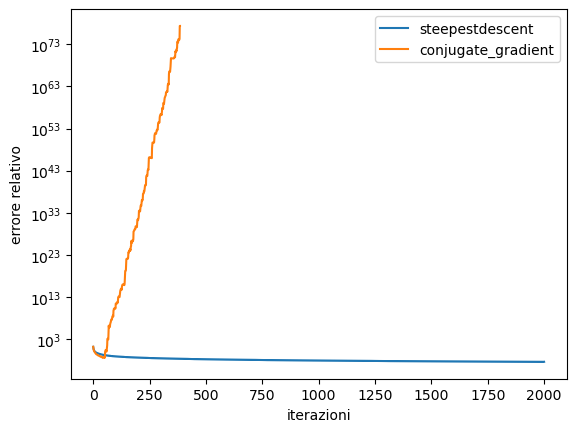

In [98]:
import matplotlib.pyplot as plt
toll = 1e-6
maxIt = 2000
x0 = np.zeros(A.shape[0]).reshape((A.shape[0],))

xS,errS,solS,itS = steepestdescent(A,b,x0,maxIt,toll)
xC,errC,solC,itC = conjugate_gradient(A,b,x0,maxIt,toll)

print("it steepest => ",itS," it Conjugate => ",itC)
print("sol steepest => ",xS)
print("sol conjugate => ",xC)


plt.semilogy(range(itS),errS,range(itC),errC)
plt.legend(["steepestdescent","conjugate_gradient"])
plt.xlabel("iterazioni")
plt.ylabel("errore relativo")
plt.show()

## Osservazioni ##
La matrice A è mal condizionata, questo provoca nei due metodi una lenta convergenza alla soluzione o addirittura una non convergenza.
Possiamo vedere come il mal condizionamento influenza la convergenza dei due metodi :
- Steepest Descent => converge lentamente proprio per via del mal condizionamento, in ogni caso ,però, converge perchè aggiorna la soluzione lungo il gradiente, senza fare ipotesi sugli autovalori della matrice A.
- Conjugate Gradient => converge molto più velocemente rispetto al metodo precedente, perchè fa ipotesi sugli autovalori della matrice A, e quindi riesce a convergere più velocemente; Questo in generale, nel nostro caso specifico, la matrice A è mal condizionata e quindi il metodo del gradiente coniugato non converge perchè fa ipotesi sugli autovalori della matrice A, che in questo caso non sono buone.

(300, 300)
condizionamento matrix => 2.095808e+01
it steepest =>  167  it Conjugate =>  38
sol steepest =>  [[ 2.32751331  2.32751331  2.32751331 ...  2.32751331  2.32751331
   2.32751331]
 [ 0.47731008  0.47731008  0.47731008 ...  0.47731008  0.47731008
   0.47731008]
 [23.23225173 23.23225173 23.23225173 ... 23.23225173 23.23225173
  23.23225173]
 ...
 [21.806188   21.806188   21.806188   ... 21.806188   21.806188
  21.806188  ]
 [ 4.14025276  4.14025276  4.14025276 ...  4.14025276  4.14025276
   4.14025276]
 [13.59518561 13.59518561 13.59518561 ... 13.59518561 13.59518561
  13.59518561]]
sol conjugate =>  [[ 2.32751379  2.32751379  2.32751379 ...  2.32751379  2.32751379
   2.32751379]
 [ 0.47731001  0.47731001  0.47731001 ...  0.47731001  0.47731001
   0.47731001]
 [23.23225356 23.23225356 23.23225356 ... 23.23225356 23.23225356
  23.23225356]
 ...
 [21.8061892  21.8061892  21.8061892  ... 21.8061892  21.8061892
  21.8061892 ]
 [ 4.14025239  4.14025239  4.14025239 ...  4.14025239  4

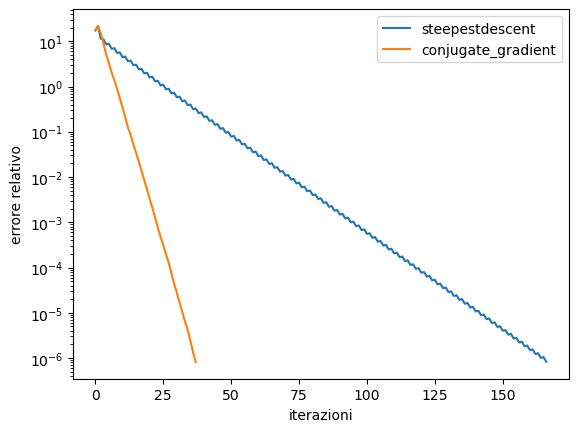

In [99]:
b1_new = np.ones(A.shape[0]).reshape(A.shape[0],1)
A1_new = A.copy()
diagMatrix = np.zeros(A.shape) 
for i in range(len(A)):
    diagMatrix[i][i] = 0.05
A1_new = A1_new + diagMatrix

# prima di eseguire i metodi controllo se posso applicarli
if checkIfDescentCanBeApply(A1_new) == False:
    exit()


xS,errS,solS,itS = steepestdescent(A1_new,b1_new,x0,maxIt,toll)
xC,errC,solC,itC = conjugate_gradient(A1_new,b1_new,x0,maxIt,toll)

print("it steepest => ",itS," it Conjugate => ",itC)
print("sol steepest => ",xS)
print("sol conjugate => ",xC)


plt.semilogy(range(itS),errS,range(itC),errC)
plt.legend(["steepestdescent","conjugate_gradient"])
plt.xlabel("iterazioni")
plt.ylabel("errore relativo")
plt.show()


## Osservazioni ## 
Ora la matrice dei termini noti è ben condizionata.
In questo esercizio possiamo vedere come il condizionamento di una matrice incide fortemente sulla convergenza dei metodi di discesa.
Quello scritto nelle precendenti osservazioni è confermato dai risultati ottenuti, cioè che il metodo di conjugate Gradient converge più veloce rispetto al metodo di discesa più ripida.

# Esercizio 2

Siano assegnati i vettori
$$
x = [1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0] , $$
$$
y = [1.18, 1.26, 1.23, 1.37, 1.37, 1.45, 1.42, 1.46, 1.53, 1.59, 1.59] 
$$

contenenti rispettivamente le ascisse e le ordinate di 11 punti del piano.

Scrivere lo script  in cui
 - si determini il polinomio di approssimazione ai minimi quadrati di grado 1 dei  punti assegnati sviluppando  le functions necessarie; **Punti: 4**
- si determini il polinomio di interpolazione dei punti assegnati sviluppando le functions necessarie;  **Punti: 4**
- si consideri il set di dati ($x_i,\hat{y}_i$) , dove $\hat{y}_i = 0.2 x_i+1$, $i = 0, ..., 10$ e si ricalcolino il polinomio di approssimazione ai minimi quadrati di grado 1 e il polinomio di interpolazione a partire dai nuovi punti $(x_i, \hat{y}_i)$, i = 0, ..., 10; **Punti: 1**
- si rappresentino in figura 1 (rispettivamente in figura 2) il primo (rispettivamente il secondo) set di punti assegnato insieme al polinomio di approssimazione ai minimi quadrati e al polinomio di interpolazione ottenuti da questi dati; **Punti: 1**
- si fornisca una spiegazione teorica ai risultati ottenuti, utilizzando i teoremi visti a lezione.   **Punti: 4**

**Totale:  14**

In [103]:
import scipy.linalg as spLin
import RisolviSis
def qrLS(A,b):
    #Risolve un sistema sovradeterminato con il metodo QR-LS
    n=A.shape[1]  # numero di colonne di A
    Q,R=spLin.qr(A)
    h=Q.T@b
    x,flag=RisolviSis.Usolve(R[0:n,:],h[0:n])
    residuo=np.linalg.norm(h[n:])**2
    return x,residuo

def plagr(xnodi,j):
    """
    Restituisce i coefficienti del j-esimo pol di
    Lagrange associato ai punti del vettore xnodi
    """
    xzeri=np.zeros_like(xnodi)
    n=xnodi.size
    if j==0:
       xzeri=xnodi[1:n]
    else:
       xzeri=np.append(xnodi[0:j],xnodi[j+1:n])
    
    num=np.poly(xzeri)
    den=np.polyval(num,xnodi[j])
    
    p=num/den
    
    return p

def InterpL(x, y, xx):
     """"
        %funzione che determina in un insieme di punti il valore del polinomio
        %interpolante ottenuto dalla formula di Lagrange.
        % DATI INPUT
        %  x  vettore con i nodi dell'interpolazione
        %  f  vettore con i valori dei nodi 
        %  xx vettore con i punti in cui si vuole calcolare il polinomio
        % DATI OUTPUT
        %  y vettore contenente i valori assunti dal polinomio interpolante
        %
     """
     n=x.size
     m=xx.size
     L=np.zeros((m,n))
     for j in range(n):
        p=plagr(x,j)
        L[:,j]=np.polyval(p,xx)
    
    
     return L@y

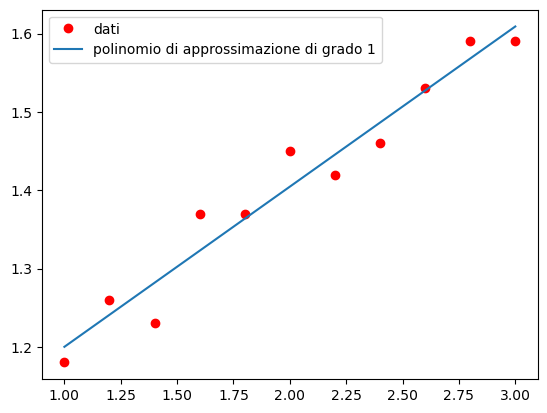

In [101]:
x = np.array([1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0])

y = np.array([1.18, 1.26, 1.23, 1.37, 1.37, 1.45, 1.42, 1.46, 1.53, 1.59, 1.59]) 

plt.plot(x,y,"ro")

xx = np.linspace(min(x),max(x),200)

n = 1

A = np.vander(x,increasing=True)[:,:n+1]
x_n,res_n = qrLS(A,y)
pol = np.polyval(np.flip(x_n),xx)


plt.plot(xx,pol)
plt.legend(["dati","polinomio di approssimazione di grado 1"])
plt.show()

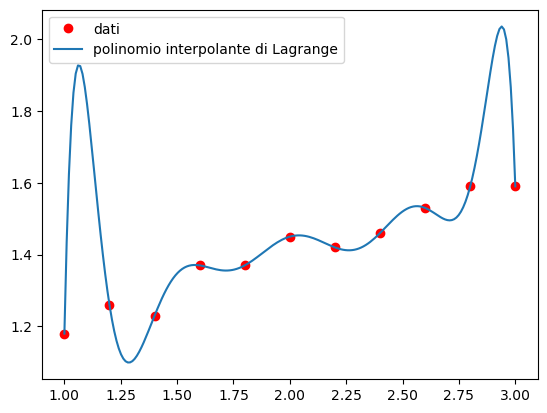

In [105]:
pol = InterpL(x,y,xx)
plt.plot(x,y,"ro")
plt.plot(xx,pol)
plt.legend(["dati","polinomio interpolante di Lagrange"])
plt.show()

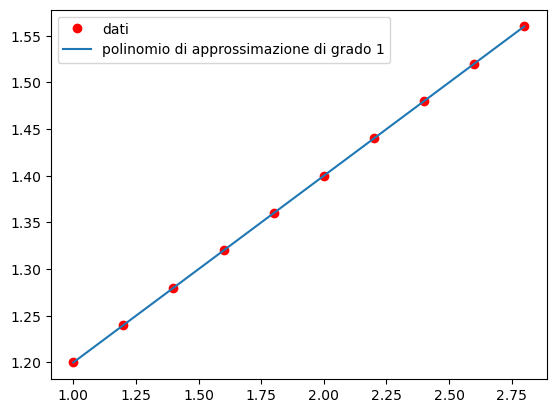

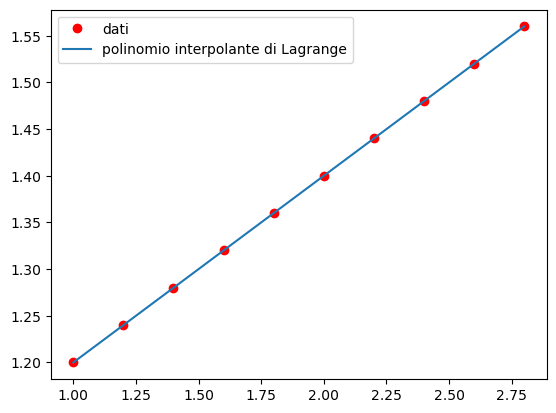

In [108]:
i = np.arange(1,11)
xi = x[0:len(i)]
y_cap = 0.2*x[0:len(i)]+1

plt.plot(xi,y_cap,"ro")

xx = np.linspace(min(xi),max(xi),200)

# polinomio di approssimazione ai minimi quadrati
n = 1

A = np.vander(xi,increasing=True)[:,:n+1]
x_n,res_n = qrLS(A,y_cap)
pol = np.polyval(np.flip(x_n),xx)


plt.plot(xx,pol)
plt.legend(["dati","polinomio di approssimazione di grado 1"])
plt.show()
# pol interpolante
pol = InterpL(xi,y_cap,xx)
plt.plot(xi,y_cap,"ro")
plt.plot(xx,pol)
plt.legend(["dati","polinomio interpolante di Lagrange"])
plt.show()

# Teorema dell'errore #
Questo teorema afferma che l'errore tra la funzione f(x) e il polinomio di approssimazione P_n(x) è dato da:
$E(x) = f(x)-P_n(x)$

Dove l'errore si annulla in due casi specifici:
- Quando la deriviata n+1 è nulla 
- Quando viene annulato il polinomio w(n+1), che sta a significare che x_perturbato è uguale a x, quindi il nostro caso

## Domanda intelligenza artificiale

- Allenamento di una rete neurale: dopo aver descritto come è composta una rete neurale, descrivi in cosa consiste la fase di forward propagation e la fase di backward propagation. **Punti: 1**
- Ottimizzazione della loss function per il training di una rete neurale per il task di regressione: Metodo di discesa del gradiente, metodo stocastico del gradiente, metodo del gradiente minibatch.  **Punti 1**  
 - Non convessità della loss-function - come non rimanere bloccati in un monimo locale? Metodo del gradiente con momentum. **Punti 2**
- Learning rate scheduling: step decay, decadimento esponenziale, decadimento dipendente dal tempo. **Punti 1**
 - Learning rate adattivo: Adagrad, RMSProp, Adadelta, Adam. **Punti 2**
 
 **Totale:  7**

### 1 ###
Una rete neurale è composta da diversi layer di neuroni (un layer è composto da almeno un neurone), i layer prendono diversi nomi in base alla loro posizione all'interno della rete:
- input layer => come dice il nome è il layer dal quale entrano gli input che devono passare per tutta la rete neurale
- output layer => è il layer dal quale esce l'output della rete
- hidden layer => questo tipo di layer può essere presente come no, e c'è ne possono essere più di uno, prende questo nome perchè si tratta dei layer contenuti tra l'input layer ed il layer di output, quindi da fuori questo layer è "nascosto".

Le connessioni tra neuroni cambiano in base al modello scelto :

- FFNN => le connessioni tra i neuroni possono essere solo in avanti, quindi non sono ammesse connessioni all'indietro (layer precedente), oppure verso il layer corrente
- Rincorrenti => sono ammesse connessioni verso il layer corrente, utile perchè viene formato uno storico, quindi di fatto la previsioni (o più generalmente l'output della rete) non è dato solo dall'input in entrata ma anche dalle previsioni passate.

Quando parliamo backpropagation intendiamo il procedimento per l'aggiornamento dei pesi delle connessioni tra i neuroni.
Back propagation un altro metodo (primo metodo proposto) per il calcolo dei pesi di una rete neurale, questo algoritmo parte dalla fine della rete e va verso l'input layer aggiornando i pesi tramite questa formula :
$$ w^k = w^{k-1}-\eta * \nabla C(w^{k-1}) $$

dove $$\eta$$ è il learning rate e $$\nabla C(w^{k-1})$$ è una variabile calcolata dall'algoritmo stesso tramite un metodo matematico chiamato differenza automatica, in sintesi tramite il calcolo delle derivate parziali l'algoritmo aggiorna i pesi ed il bias.

Mentre per forward propagation intendiamo il passaggio dei dati dal layer di input al layer di output, nello specifico vengono eseguiti questi passaggi per ogni neurone:
- passaggio dei dati al neurone k
- calcolo della somma ponderata di tutti i dati ricevuti + un bias 
- il risultato della somma viene passato ad una funzione di attivazione che produce un valore di attivazione a
- questo valore a viene poi propagato al layer successivo
- ripetizione di questo procedimento per ogni neurone fino a ricevere l'output  

# 2 #
### batch gradient descent ###
Il batch gradient descent è un metodo nel quale, per la riduzione della funzione di costo C(w), viene passato tutto il training set alla rete neurale, ottendendo un determinato output con il quale si riesce a calcolare la cost function e successivamente si effettua la backpropagation per aggiornare tutti i pesi della rete neurale in base alla C appena calcolata.
Procedimento ripetuto per ogni epoca/iterazione.
#### caratteristiche ####
- Il costo di calcolo è molto elevato, dato che passiamo un enorme mole di dati alla rete neurale.

- la funzione costo viene ridotta uniformemente dopo ogni epoca

### STG ###
A livello di scopo e di procedimenti eseguiti è uguale al batch gradient descent, con la sola ma essenziale differenza che viene passata una osservazione, che corrisponde ad una unità del training set, e per ogni osservazione viene eseguita un aggiornamento dei pesi ed una riduzione della cost function => questo procedimento viene ripetuto per ogni epoca.
#### caratteristiche ####
- il costo di calcolo è poco rispetto al Batch Descent, ma dato che ad ogni iterazione devo aggiornare i pesi in base alla funzione di costo, il tempo generale di calcolo è simile se non lo stesso del Batch

- proprio perchè ad ogni iterazione effettuo l'aggiornamento dei pesi, la funzione di costo viene ridotta in maniera non fluida creando una funzione di costo che presenta svariate variazioni

### minibatch gradient descent ###
Come i precedenti due metodi ma in input viene passato in input un insieme di osservazioni, che corrisponde ad un sottoinsieme del training set.

#### caratteristiche ####

- miglior metodo parlando di costo di calcolo

- la cost function viene ridotta molto di più rispetto al batch gradient e con meno oscillazioni rispetto a STG 

.......